In [1]:
import json
import requests
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # matplotlib is not installed automatically
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
success_list = ["Central_valley", "China (Mid-lat humid)", "South Dacota (Mid-lat dry)", "Argentina (Mid-lat dry)", "Russia (Mid-lat humid)"]

home_dir = r"G:\Araki\SMSigxSMAP"
input_path = r"3_data_out\exp_plots"
output_path = r"3_data_out\exp_plots"


In [3]:

# Create an empty list to store the dataframes
dfs = []

# Loop through the target stations
for station in success_list:
    # Construct the path to the file
    filepath = os.path.join(home_dir, input_path, station, 'event_df_with_curvefit.csv')
    # Read the file into a pandas dataframe
    df = pd.read_csv(filepath)
    # Add a new column with the station name
    df['station'] = station
    # Append the dataframe to the list
    dfs.append(df)

# Concatenate all the dataframes together
result = pd.concat(dfs)

In [4]:
result = result.reset_index(drop=True)
result.head()


,Unnamed: 0,event_start,event_end,soil_moisture_daily,precip,PET,LAI,NDVI,delta_theta,theta_w,tau,r_squared,opt_drydown,mean_PET,event_length,station
0,0,2015-04-08,2015-04-15,"[0.1938336, 0.1269245, 0.1052133, 0.1003775, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[3.47952, 2.94221, 3.96109, 4.97817, 4.31703, ...","[0.47146745958623, 0.4745707345673842, 0.47767...","[0.2884277929907134, 0.2880106486119071, 0.287...",0.142930,0.043795,2.790355,0.920730,"[0.18412186129333072, 0.14185660578008907, 0.1...",4.321578,8,Central_valley
1,1,2015-05-15,2015-05-20,"[0.1854006, 0.1262002, 0.0775566, 0.0886219, 0...","[9.00288, 0.01728, 0.0, 0.0, 0.0, 0.0]","[3.03355, 4.65725, 3.64919, 4.45827, 4.36546, ...","[0.4459795627774521, 0.4454246586816317, 0.444...","[0.2585902328451656, 0.2571536882320389, 0.255...",0.116119,0.037295,1.922837,0.952887,"[0.1848807015971414, 0.1250319166070795, 0.089...",4.155242,6,Central_valley
2,2,2015-11-05,2015-11-09,"[0.1979806, 0.1901787, 0.1632289, 0.1536073, 0...","[0.0, 0.0, 0.0, 0.0, 0.0]","[1.88989, 1.91662, 2.14162, 2.09361, 1.58824]","[0.2802914816986347, 0.2839035932657677, 0.287...","[0.2473040792626443, 0.2495786725856694, 0.251...",0.093761,0.083571,5.565694,0.963257,"[0.20176666643747454, 0.18232867264944524, 0.1...",1.925996,5,Central_valley
3,3,2015-11-10,2015-11-16,"[0.2465152, 0.1989249, 0.178879, 0.1621606, 0....","[11.55168, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.17364, 1.41344, 1.50433, 1.57533, 1.92462, ...","[0.2979751235446854, 0.3012103191222045, 0.304...","[0.2600811711078536, 0.2637598896609628, 0.267...",0.107632,0.145349,1.731806,0.992203,"[0.2456759903192415, 0.20166634886142035, 0.17...",1.588424,7,Central_valley
4,4,2016-03-12,2016-03-29,"[0.2832137, 0.2196951, 0.2306282, 0.208455, 0....","[0.93312, 0.0, 0.52704, 0.0, 0.0, 0.0, 0.0, 0....","[1.9586, 1.67819, 2.50363, 2.854, 3.11875, 3.5...","[1.0056977133763296, 0.9909707680710278, 0.990...","[0.4323719759135045, 0.4218991802556192, 0.420...",0.101425,0.059474,5.979991,0.959894,"[0.2754369736054637, 0.2421808689961992, 0.214...",3.293423,18,Central_valley


In [12]:
import ast

# Convert the string in 'PET' column to a list
result['PET'] = result['PET'].apply(ast.literal_eval)
result['LAI'] = result['LAI'].apply(ast.literal_eval)
result['NDVI'] = result['NDVI'].apply(ast.literal_eval)


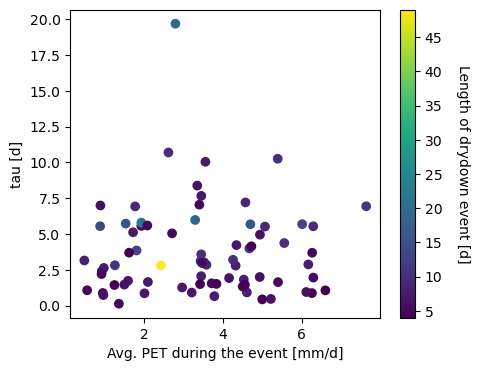

In [6]:
import matplotlib.colors as colors
result['mean_PET'] = result['PET'].apply(np.mean)
fig, ax = plt.subplots(1,1, figsize=(5, 4))
sc = ax.scatter(result['mean_PET'], result['tau'], c=result['event_length']) #, norm=colors.LogNorm())
ax.set_xlabel('Avg. PET during the event [mm/d]')
ax.set_ylabel('tau [d]')
cbar = fig.colorbar(sc)
cbar.ax.set_ylabel('Length of drydown event [d]', rotation=270, labelpad=20)
fig.savefig(os.path.join(home_dir, output_path, f'all_stations_tau_vs_PET.png'))

In [9]:
result.head()

,Unnamed: 0,event_start,event_end,soil_moisture_daily,precip,PET,LAI,NDVI,delta_theta,theta_w,tau,r_squared,opt_drydown,mean_PET,event_length,station
0,0,2015-04-08,2015-04-15,"[0.1938336, 0.1269245, 0.1052133, 0.1003775, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[3.47952, 2.94221, 3.96109, 4.97817, 4.31703, ...","[0.47146745958623, 0.4745707345673842, 0.47767...","[0.2884277929907134, 0.2880106486119071, 0.287...",0.142930,0.043795,2.790355,0.920730,"[0.18412186129333072, 0.14185660578008907, 0.1...",4.321578,8,Central_valley
1,1,2015-05-15,2015-05-20,"[0.1854006, 0.1262002, 0.0775566, 0.0886219, 0...","[9.00288, 0.01728, 0.0, 0.0, 0.0, 0.0]","[3.03355, 4.65725, 3.64919, 4.45827, 4.36546, ...","[0.4459795627774521, 0.4454246586816317, 0.444...","[0.2585902328451656, 0.2571536882320389, 0.255...",0.116119,0.037295,1.922837,0.952887,"[0.1848807015971414, 0.1250319166070795, 0.089...",4.155242,6,Central_valley
2,2,2015-11-05,2015-11-09,"[0.1979806, 0.1901787, 0.1632289, 0.1536073, 0...","[0.0, 0.0, 0.0, 0.0, 0.0]","[1.88989, 1.91662, 2.14162, 2.09361, 1.58824]","[0.2802914816986347, 0.2839035932657677, 0.287...","[0.2473040792626443, 0.2495786725856694, 0.251...",0.093761,0.083571,5.565694,0.963257,"[0.20176666643747454, 0.18232867264944524, 0.1...",1.925996,5,Central_valley
3,3,2015-11-10,2015-11-16,"[0.2465152, 0.1989249, 0.178879, 0.1621606, 0....","[11.55168, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.17364, 1.41344, 1.50433, 1.57533, 1.92462, ...","[0.2979751235446854, 0.3012103191222045, 0.304...","[0.2600811711078536, 0.2637598896609628, 0.267...",0.107632,0.145349,1.731806,0.992203,"[0.2456759903192415, 0.20166634886142035, 0.17...",1.588424,7,Central_valley
4,4,2016-03-12,2016-03-29,"[0.2832137, 0.2196951, 0.2306282, 0.208455, 0....","[0.93312, 0.0, 0.52704, 0.0, 0.0, 0.0, 0.0, 0....","[1.9586, 1.67819, 2.50363, 2.854, 3.11875, 3.5...","[1.0056977133763296, 0.9909707680710278, 0.990...","[0.4323719759135045, 0.4218991802556192, 0.420...",0.101425,0.059474,5.979991,0.959894,"[0.2754369736054637, 0.2421808689961992, 0.214...",3.293423,18,Central_valley


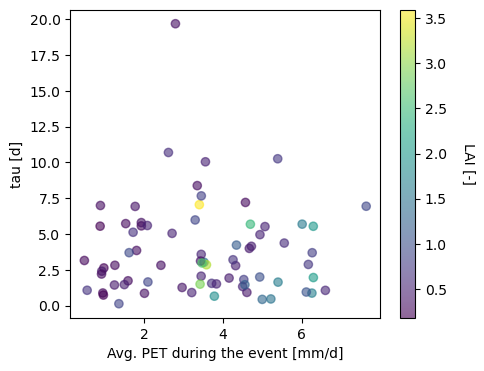

In [18]:
result['mean_LAI'] = result['LAI'].apply(np.mean)
fig, ax = plt.subplots(1,1, figsize=(5, 4))
sc = ax.scatter(result['mean_PET'], result['tau'], c=result['mean_LAI'], alpha=0.6) #, norm=colors.LogNorm())
ax.set_xlabel('Avg. PET during the event [mm/d]')
ax.set_ylabel('tau [d]')
cbar = fig.colorbar(sc)
cbar.ax.set_ylabel('LAI [-]', rotation=270, labelpad=20)
fig.savefig(os.path.join(home_dir, output_path, f'all_stations_tau_vs_PET_vs_LAI.png'))

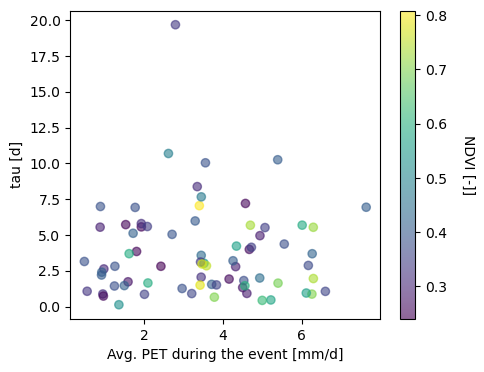

In [19]:
result['mean_NDVI'] = result['NDVI'].apply(np.mean)
fig, ax = plt.subplots(1,1, figsize=(5, 4))
sc = ax.scatter(result['mean_PET'], result['tau'], c=result['mean_NDVI'], alpha=0.6) #, norm=colors.LogNorm())
ax.set_xlabel('Avg. PET during the event [mm/d]')
ax.set_ylabel('tau [d]')
cbar = fig.colorbar(sc)
cbar.ax.set_ylabel('NDVI [-]]', rotation=270, labelpad=20)
fig.savefig(os.path.join(home_dir, output_path, f'all_stations_tau_vs_PET_vs_NDVI.png'))

Text(0, 0.5, 'tau [d]')

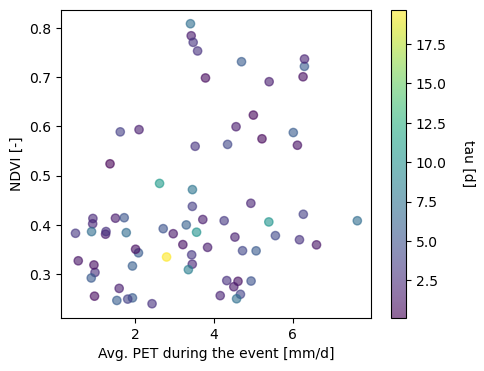

In [20]:
fig, ax = plt.subplots(1,1, figsize=(5, 4))
sc = ax.scatter(result['mean_PET'], result['mean_NDVI'], c=result['tau'], alpha=0.6) #, norm=colors.LogNorm())
ax.set_xlabel('Avg. PET during the event [mm/d]')
ax.set_ylabel('NDVI [-]')
cbar = fig.colorbar(sc)
cbar.ax.set_ylabel('tau [d]', rotation=270, labelpad=20)

Text(0, 0.5, 'tau [d]')

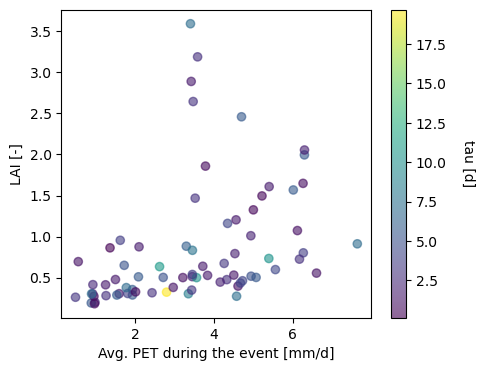

In [21]:
fig, ax = plt.subplots(1,1, figsize=(5, 4))
sc = ax.scatter(result['mean_PET'], result['mean_LAI'], c=result['tau'], alpha=0.6) #, norm=colors.LogNorm())
ax.set_xlabel('Avg. PET during the event [mm/d]')
ax.set_ylabel('LAI [-]')
cbar = fig.colorbar(sc)
cbar.ax.set_ylabel('tau [d]', rotation=270, labelpad=20)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(5, 4))
sc = ax.scatter(result['mean_PET'], result['tau'], c=result['bulk_density']) #, norm=colors.LogNorm())
ax.set_xlabel('Avg. PET during the event [mm/d]')
ax.set_ylabel('tau [d]')
cbar = fig.colorbar(sc)
cbar.ax.set_ylabel('Bulk density [m3/m3]', rotation=270, labelpad=20)
# fig.savefig(os.path.join(home_dir, output_path, f'all_stations_tau_vs_PET.png'))

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(5, 4))
sc = ax.scatter(result['mean_PET'], result['tau'], c=result['sand_fraction']) #, norm=colors.LogNorm())
ax.set_xlabel('Avg. PET during the event [mm/d]')
ax.set_ylabel('tau [d]')
cbar = fig.colorbar(sc)
cbar.ax.set_ylabel('Sand fraction[-]]', rotation=270, labelpad=20)
# fig.savefig(os.path.join(home_dir, output_path, f'all_stations_tau_vs_PET.png'))

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(5, 4))
sc = ax.scatter(result['mean_PET'], result['tau'], c=result['clay_fraction']) #, norm=colors.LogNorm())
ax.set_xlabel('Avg. PET during the event [mm/d]')
ax.set_ylabel('tau [d]')
cbar = fig.colorbar(sc)
cbar.ax.set_ylabel('Clay fraction[-]]', rotation=270, labelpad=20)
# fig.savefig(os.path.join(home_dir, output_path, f'all_stations_tau_vs_PET.png'))